In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
##Model import
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
#from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [14]:
data = pd.read_csv('data/stud.csv')


In [17]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y features

In [18]:
x = data.drop(columns=['math score'],axis=1)
y = data['math score']

In [21]:
## Create column transformer for 3 different transform
num_feature = x.select_dtypes(exclude='object').columns
cat_feature = x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder ,StandardScaler
from sklearn.compose import ColumnTransformer

num_transform = StandardScaler()
oh_transform = OneHotEncoder()

preprocessor = ColumnTransformer(
        [
                ('OneHotEncoder',oh_transform,cat_feature),
                ('StandardScaler',num_transform,num_feature)
        ]
)

In [22]:
X = preprocessor.fit_transform(x)

In [25]:
X.shape

(1000, 19)

In [26]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

Create an evaluate fun for model testing

In [28]:
def evaluate_model(true,predicted):
        mae = mean_absolute_error(true,predicted)
        mse = mean_squared_error(true,predicted)
        rmse=np.sqrt(mse)
        r2square= r2_score(true,predicted)
        return mae,rmse,r2square

In [30]:
models = {
        "LinearRegression" : LinearRegression(),
        "Lasso" :Lasso(),
        "Ridge" : Ridge(),
        "KNeighborsRegressor" : KNeighborsRegressor(),
        "DecisionTreeRegressor" : DecisionTreeRegressor(),
        "RandomForestRegressor" : RandomForestRegressor(),
        "CatBoostRegressor" : CatBoostRegressor(),
        "AdaBoostRegressor" : AdaBoostRegressor(),

}
model_list = []
r2_list = []

for i in range (len(list(models))):
        model = list(models.values())[i]
        model.fit(x_train,y_train)#Train model

        #Make predction
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)

        # Evaluate the Train and Test dataset
        model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
        
        model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)

        print(list(models.keys())[i])
        model_list.append(list(models.keys())[i])

        print("Model performence for training set")
        print("- RMSE: {:.4f}".format(model_train_rmse))
        print("- MAE: {:.4f}".format(model_train_mae))
        print("- R2 score: {:.4f}".format(model_train_r2))

        print("------------------------------------")

        print("Model performence for test set")
        print("- RMSE: {:.4f}".format(model_test_rmse))
        print("- MAE: {:.4f}".format(model_test_mae))
        print("- R2 score: {:.4f}".format(model_test_r2))
        r2_list.append(model_test_r2)

        print('+'*35)
        print('\n')

LinearRegression
Model performence for training set
- RMSE: 5.3257
- MAE: 4.2695
- R2 score: 0.8742
------------------------------------
Model performence for test set
- RMSE: 5.4212
- MAE: 4.2347
- R2 score: 0.8792
+++++++++++++++++++++++++++++++++++


Lasso
Model performence for training set
- RMSE: 6.5938
- MAE: 5.2063
- R2 score: 0.8071
------------------------------------
Model performence for test set
- RMSE: 6.5197
- MAE: 5.1579
- R2 score: 0.8253
+++++++++++++++++++++++++++++++++++


Ridge
Model performence for training set
- RMSE: 5.3233
- MAE: 4.2650
- R2 score: 0.8743
------------------------------------
Model performence for test set
- RMSE: 5.3904
- MAE: 4.2111
- R2 score: 0.8806
+++++++++++++++++++++++++++++++++++


KNeighborsRegressor
Model performence for training set
- RMSE: 5.7079
- MAE: 4.5168
- R2 score: 0.8555
------------------------------------
Model performence for test set
- RMSE: 7.2530
- MAE: 5.6210
- R2 score: 0.7838
+++++++++++++++++++++++++++++++++++


Dec

Results

In [34]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name',"R2_score"]).sort_values(by=["R2_score"],ascending=False)

,Model Name,R2_score
2,Ridge,0.880593
0,LinearRegression,0.879226
6,CatBoostRegressor,0.851632
5,RandomForestRegressor,0.851285
7,AdaBoostRegressor,0.849868
1,Lasso,0.825320
3,KNeighborsRegressor,0.783813
4,DecisionTreeRegressor,0.736848


Linear Regrassion

In [39]:
lin_model= LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of model is %.2f"  %score,"%")

Accuracy of model is 87.92 %


Plot Y_pred and Y_test

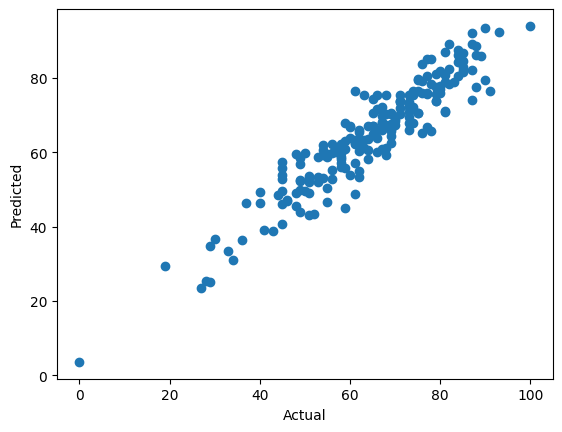

In [41]:
plt.scatter(y_test,y_pred);
plt.xlabel("Actual");
plt.ylabel("Predicted");

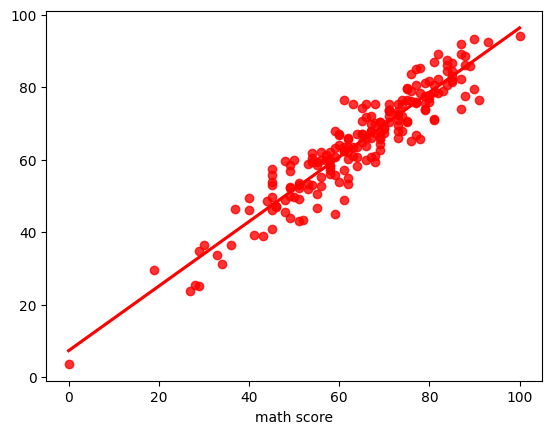

In [42]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red');

The difference between the actual and predicted values

In [43]:
pred_data = pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_data

,Actual value,Predicted value,Difference
521,91,76.546875,14.453125
737,53,58.839844,-5.839844
740,80,76.945312,3.054688
660,74,76.570312,-2.570312
411,84,87.535156,-3.535156
...,...,...,...
408,52,43.468750,8.531250
332,62,62.042969,-0.042969
208,74,67.843750,6.156250
613,65,67.167969,-2.167969


In [46]:
pred_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Actual value,200.0,64.460000,15.638453,0.000000,55.000000,66.000000,76.000000,100.000000
Predicted value,200.0,64.682207,14.846498,3.628906,55.861328,65.976562,75.455078,93.960938
Difference,200.0,-0.222207,5.430188,-15.406250,-3.573242,-0.382812,3.263672,14.453125
